Необходимо спрогнозировать стоимость домов для Бостона (MEDV), перед прогнозированием выполните EDA, чтобы можно было презентовать квартиры и Ваши прогнозы (сравните алгоритмы машинного обучения и НС)

* RIM: уровень преступности на душу населения по городам.
* ZN: доля земли под жилую застройку - зонирована под участки площадью более 25 000 кв. футов.
* INDUS: доля акров, не относящихся к розничной торговле, на город.
* CHAS: фиктивная переменная - река Чарльз (1 - участок возле реки, 0 - нет)
* NOX: концентрация оксидов азота 
* RM: среднее количество комнат в доме
* AGE: доля жилых единиц, построенных до 1940 г.
* DIS: взвешенные расстояния до пяти Бостонских центров занятости
* RAD: показатель доступности радиальных магистралей.
* TAX: полная ставка налога на имущество из расчета на 10 000 долларов.
* PTRATIO: соотношение учеников и учителей по городам
* B: показатель рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля лиц афроамериканского происхождения по городам.
* LSTAT: процент более низкого статуса населения.

* TARGET -- MEDV:  средняя стоимость домов


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import tensorflow
import keras

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD 
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Введем callback
callbacks_list = [
        keras.callbacks.EarlyStopping(monitor='val_mae', patience=5),
        keras.callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.1, patience=10)  
]

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape


(506,)

### EDA

In [ ]:
# Введем название колонок
col = ['RIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df = pd.DataFrame(X)
df['13'] = y 
df.columns = col
df.head()

,RIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


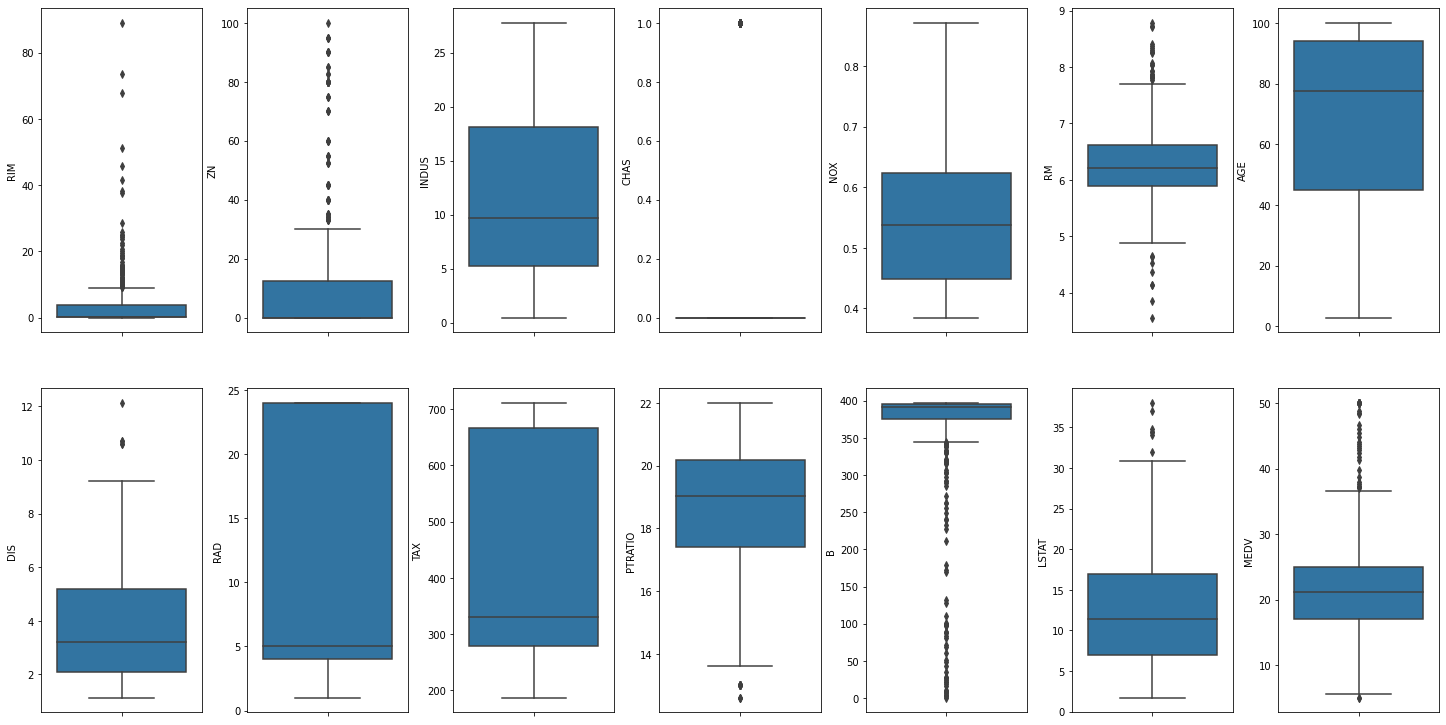

In [ ]:
# Посмотрим, как распределены признаки
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

выборосы наблюдаются у признаков RIM, ZN, B, RM 

In [ ]:
# Какая часть данных имеет выброс по каждому признаку
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column RIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [ ]:
# Работаем с выбросами 
for col in df.columns:
    if col=='MEDV':
        pass
    else:
        perc_90 = round(np.percentile(df[col], 90), 0)
        perc_10 = round(np.percentile(df[col], 10), 0)
        df.loc[df[col]>=perc_90, col] = perc_90
        df.loc[df[col]<=perc_10, col] = perc_10
        print(f'{col} заменяем выбросы снизу {perc_10}, сверху {perc_90}')

RIM заменяем выбросы снизу 0.0, сверху 11.0
ZN заменяем выбросы снизу 0.0, сверху 42.0
INDUS заменяем выбросы снизу 3.0, сверху 20.0
CHAS заменяем выбросы снизу 0.0, сверху 0.0
NOX заменяем выбросы снизу 0.0, сверху 1.0
RM заменяем выбросы снизу 6.0, сверху 7.0
AGE заменяем выбросы снизу 27.0, сверху 99.0
DIS заменяем выбросы снизу 2.0, сверху 7.0
RAD заменяем выбросы снизу 3.0, сверху 24.0
TAX заменяем выбросы снизу 233.0, сверху 666.0
PTRATIO заменяем выбросы снизу 15.0, сверху 21.0
B заменяем выбросы снизу 290.0, сверху 397.0
LSTAT заменяем выбросы снизу 5.0, сверху 23.0


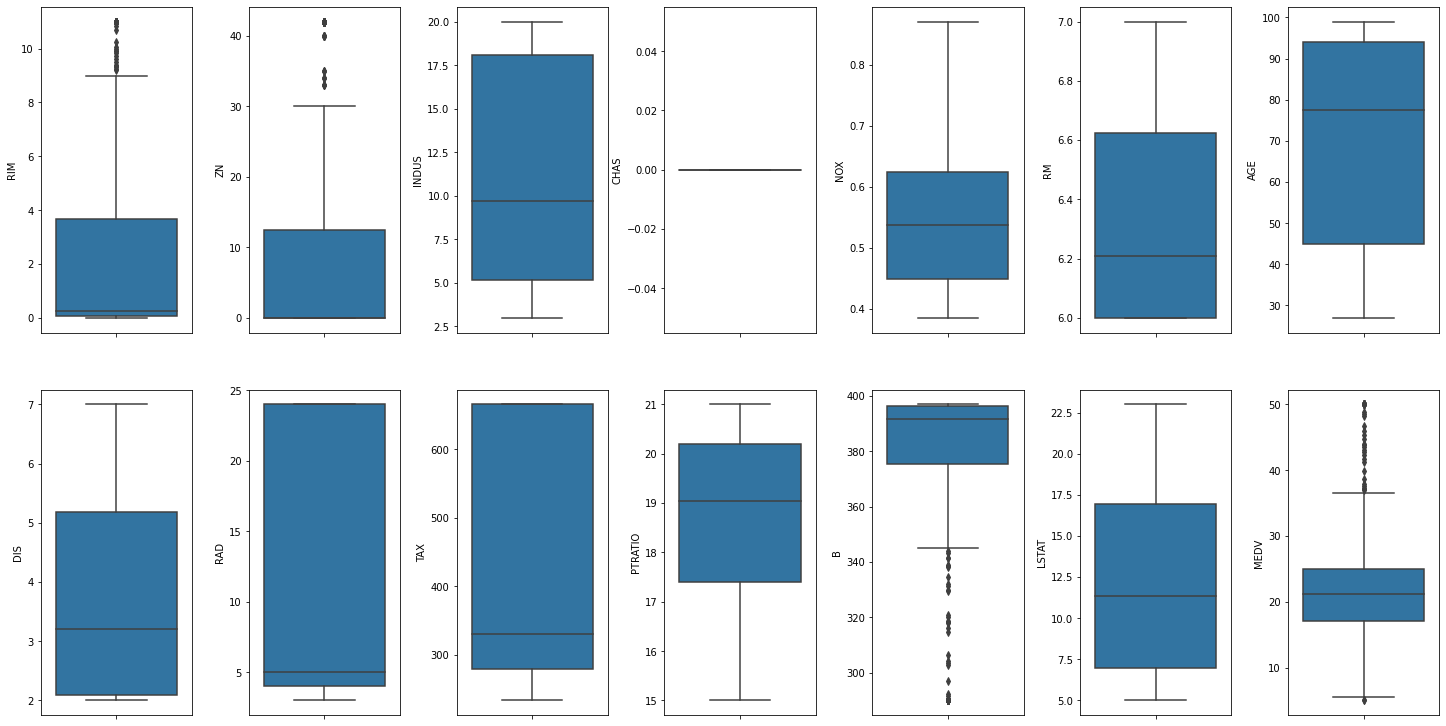

In [ ]:
# Посмотрим еще раз на выбросы в признаках 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# df = df[df['MEDV'] <= 45.0]
# print(np.shape(df))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

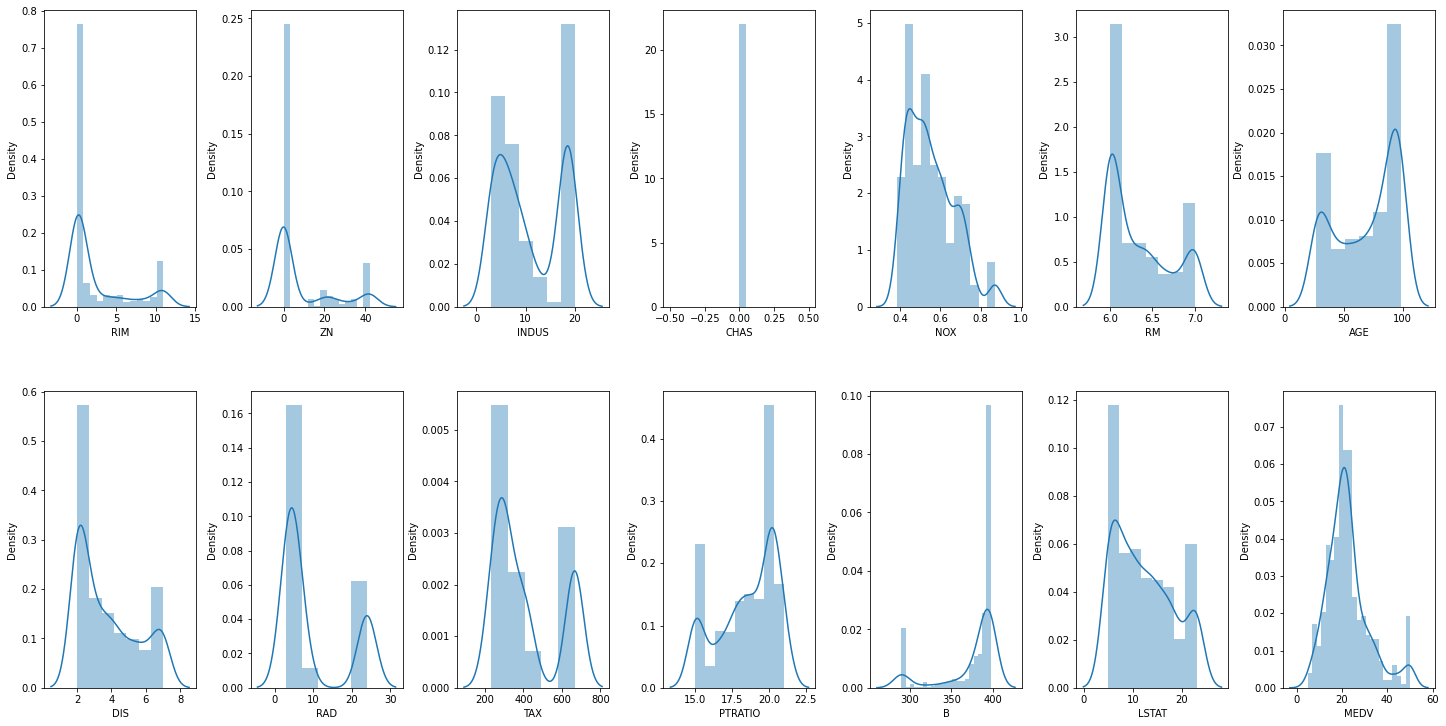

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Корреляция признаков

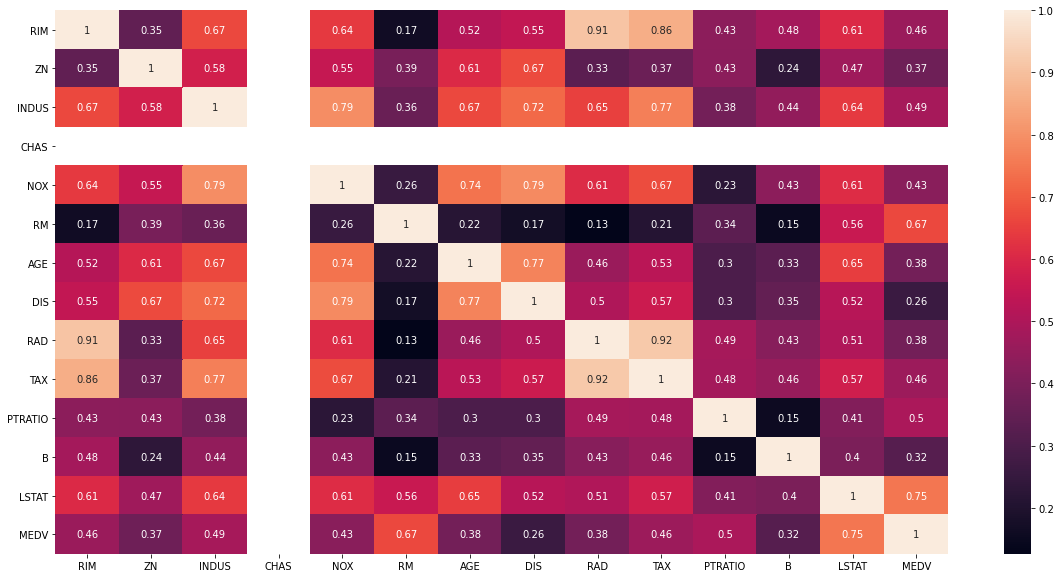

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

сильная корреляция с Таргетом (MEDV) наблюдается у признаков LSTAT, RM, TAX

Сильно коррелируют друг с другом признаки RIM и RAD, RIM и TAX

In [ ]:
# Нормализуем признаки
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
# Посмотрим зависимость между главными признаками ниже и таргетом
col_for_target = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

In [ ]:
x = df.loc[:,col_for_target]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=col_for_target)

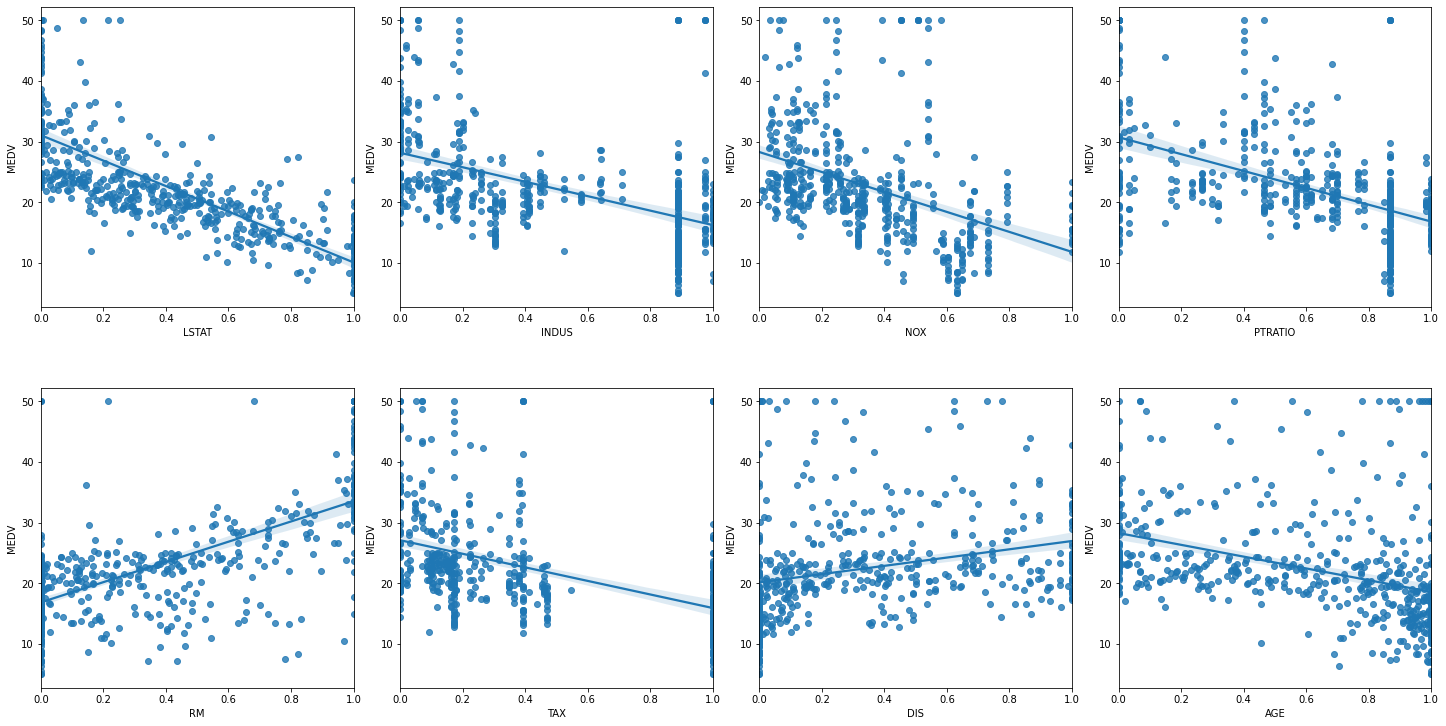

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(col_for_target):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Построение модели

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def train_linear_model(X, y, validation_split=0.2): 
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_split, random_state=42)
  
  print(X_train.shape)
  print(y_train.shape)
  
  # Регрессия
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  mae_train = mean_absolute_error(y_train, lr.predict(X_train))
  mse_train = mean_squared_error(y_train, lr.predict(X_train))

  mae_test = mean_absolute_error(y_test, lr.predict(X_test))
  mse_test = mean_squared_error(y_test, lr.predict(X_test))

  # Результат по моделям в виде датафрэйма
  result_lr = pd.DataFrame({'model': 'Linear', 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])


  # Случайный лес
  rf = RandomForestRegressor(random_state=17, max_depth=5)
  rf.fit(X_train, y_train)

  mae_train_rf = mean_absolute_error(y_train, rf.predict(X_train))
  mse_train_rf = mean_squared_error(y_train, rf.predict(X_train))

  mae_test_rf = mean_absolute_error(y_test, rf.predict(X_test))
  mse_test_rf = mean_squared_error(y_test, rf.predict(X_test))

  # Результат по моделям в виде датафрэйма
  result_rf = pd.DataFrame({'model': 'Random Forest', 
                          'mae_train': mae_train_rf, 'mae_test': mae_test_rf
                          }, index=[0])

  for i in [lr, rf]:
    # Графики сравнения моделей
    _, ax = plt.subplots(figsize=(8, 6))

    y_pred = i.predict(X_test)

    ax.scatter(y=y_pred, x=y_test, c = 'red')
    plt.title('True/Predicted value of'+str(i)+' model')
    plt.ylabel('Predicted value')
    plt.xlabel('True value')
    plt.legend()
    plt.show()

  result = pd.concat([result_lr, result_rf])
  result = result.reset_index(drop=True)
  return result
 

(404, 8)
(404,)


No handles with labels found to put in legend.


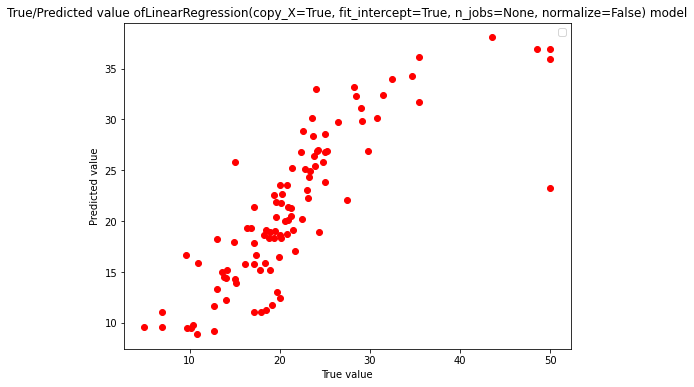

No handles with labels found to put in legend.


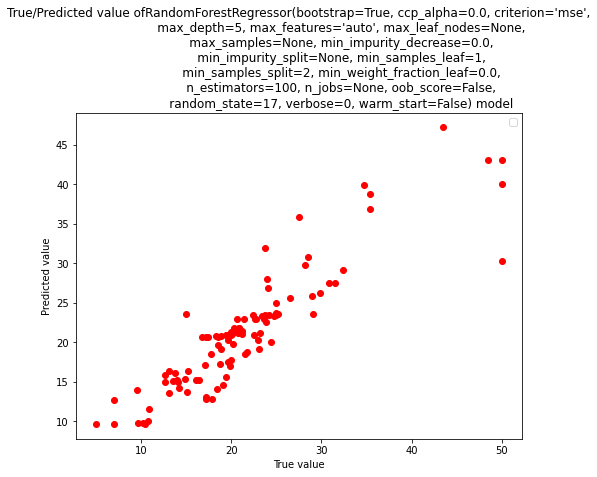

In [ ]:
# на основных признаках
result = train_linear_model(x,y)


In [ ]:
result

,model,mae_train,mae_test
0,Linear,3.553411,3.211331
1,Random Forest,1.962833,2.529540


In [ ]:
# на всех признаках
X_prepared = df.drop(columns=['MEDV']).values
y_prepared = y

(404, 13)
(404,)


No handles with labels found to put in legend.


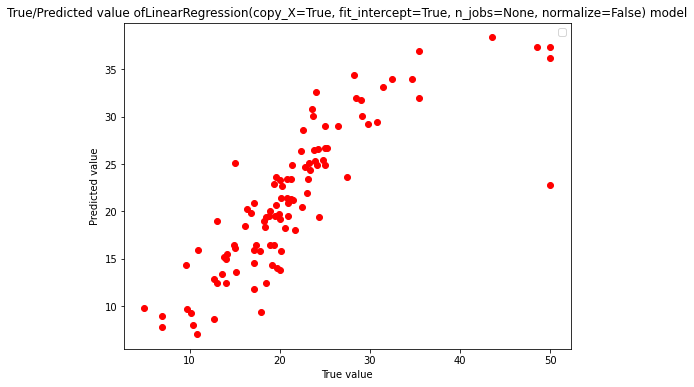

No handles with labels found to put in legend.


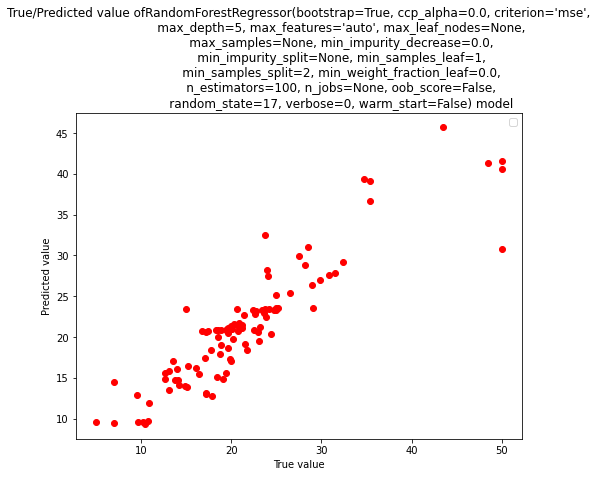

In [ ]:
result = train_linear_model(X_prepared,y_prepared)

In [ ]:
result

,model,mae_train,mae_test
0,Linear,3.410858,3.127612
1,Random Forest,1.886987,2.447209


На всех признаках результат лучше

### модели НС

In [ ]:
def train_model(X, y, callbacks_list, num_epochs=50, validation_split=0.2): 
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_split, random_state=42)
  
  print(X_train.shape)
  print(y_train.shape)

  # Стандартизация 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  #### Сети #### 
  
  # 1 слой
  model1 = Sequential()
  model1.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model1.add(Dense(1, activation='linear'))
  model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h1 = model1.fit(X_train, y_train, epochs=num_epochs,
                  verbose=0, validation_split=validation_split,
                  callbacks=callbacks_list)
  
  mse_train, mae_train = model1.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model1.evaluate(X_test, y_test, verbose=0)
  
  result1 = pd.DataFrame({ 'dense_cnt': 1, 'mae_train': mae_train,
                           'mae_test': mae_test
                          }, index=[0])
  
  # 2 слоя 
  model2 = Sequential()
  model2.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dense(1, activation='linear'))
  model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h2 = model2.fit(X_train, y_train, epochs=num_epochs, 
                  verbose=0, validation_split=validation_split,
                  callbacks=callbacks_list)

  mse_train, mae_train = model2.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model2.evaluate(X_test, y_test, verbose=0)
  
  result2 = pd.DataFrame({'dense_cnt': 2, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])

  # 3 слоя
  model3 = Sequential()
  model3.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model3.add(Dense(50, activation='relu'))
  model3.add(Dense(10, activation='relu'))
  model3.add(Dense(1, activation='linear')) 
  model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h3 = model3.fit(X_train, y_train, epochs=num_epochs,
                  verbose=0, validation_split=validation_split,
                  callbacks=callbacks_list)

  mse_train, mae_train = model3.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model3.evaluate(X_test, y_test, verbose=0)
  
  # Результат по моделям в виде датафрэйма
  result3 = pd.DataFrame({'dense_cnt': 3, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])

  # Графики работы моделей
  for h in [h1, h2, h3]:
      plt.subplots(figsize=(8, 6)) 
      # Mae values
      plt.plot(h.history['mae'])
      plt.plot(h.history['val_mae']) # для тренировочного 
      plt.title('Model'+str(h)+'mae')
      plt.ylabel('mae')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()

      plt.subplots(figsize=(8, 6)) 
      # Loss values
      plt.plot(h.history['loss'])
      plt.plot(h.history['val_loss']) # для тренировочного 
      plt.title('Model'+str(h)+'Loss')
      plt.ylabel('loss')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()
    

  # Графики сравнения моделей
  for i in enumerate([model1, model2, model3]):
    _, ax = plt.subplots(figsize=(8, 6))

    y_pred = i[1].predict(X_test)

    # ax.scatter(y=pd.DataFrame(y_test).index, x=y_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
    # ax.scatter(y=pd.DataFrame(y_test).index, x=y_pred, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

    # plt.title('Actual and predicted values of model '+str(i[0]))
    # plt.ylabel('test №')
    # plt.xlabel('value')

    ax.scatter(y=y_pred, x=y_test, c = 'red')
    plt.title('True/Predicted value of model №'+str(i[0]+1))
    plt.ylabel('Predicted value')
    plt.xlabel('True value')
    plt.legend()
    plt.show()


  result = pd.concat([result1, result2, result3])
  result = result.reset_index(drop=True)
  return result
 

(404, 8)
(404,)


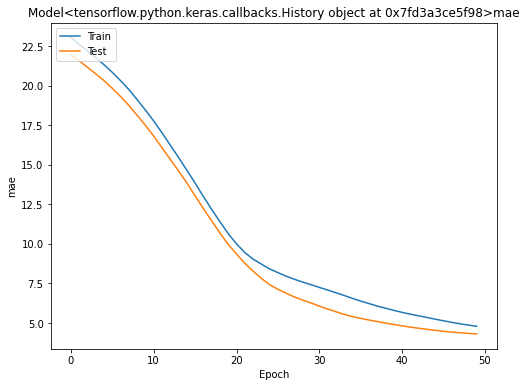

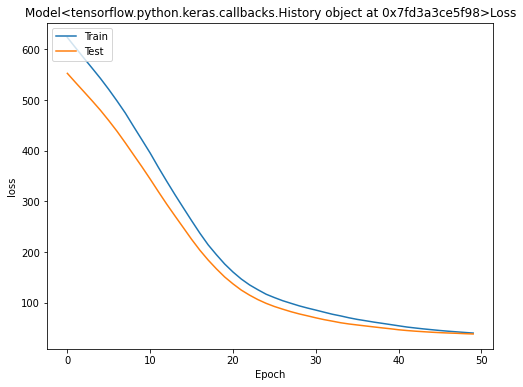

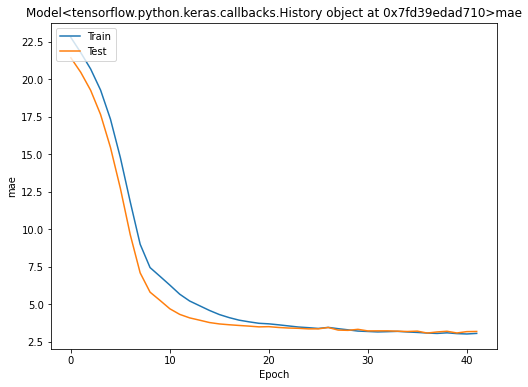

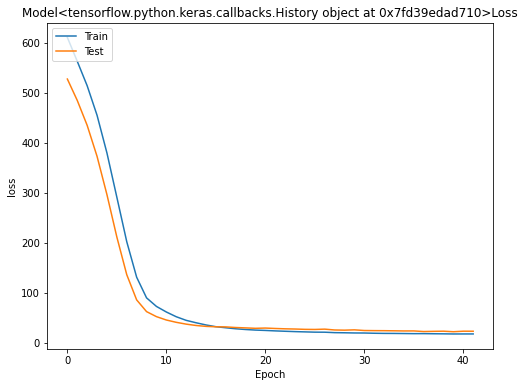

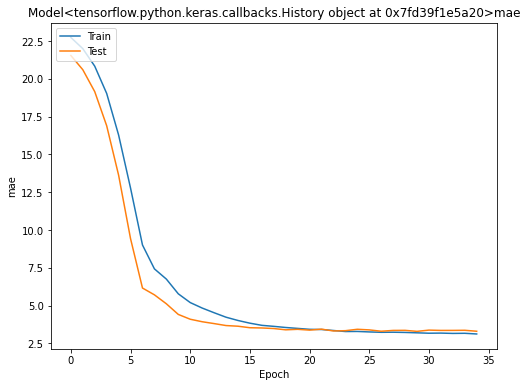

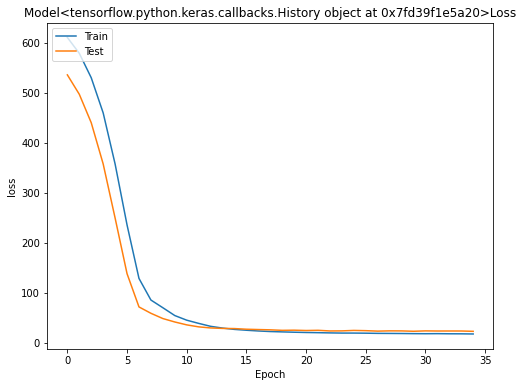

No handles with labels found to put in legend.


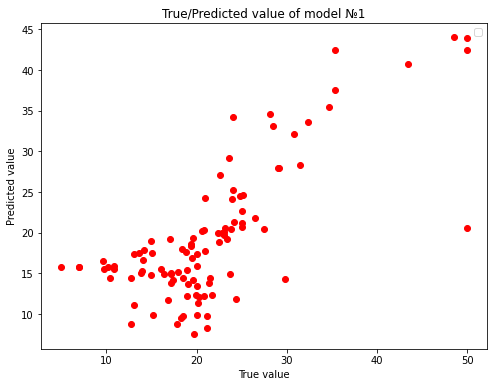

No handles with labels found to put in legend.


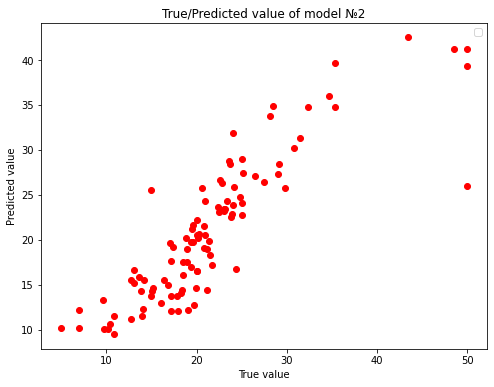

No handles with labels found to put in legend.


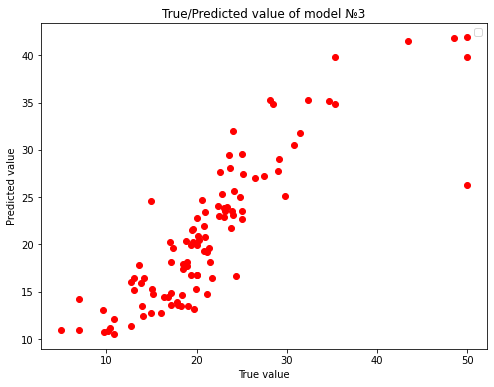

In [ ]:
# 50 эпох. На основных признаках - отобранные по корреляционной матрице 
result = train_model(x, y, callbacks_list, validation_split=0.2)

In [ ]:
result

,dense_cnt,mae_train,mae_test
0,1,4.657252,4.804962
1,2,3.071599,2.855543
2,3,3.148951,2.892333


(404, 13)
(404,)


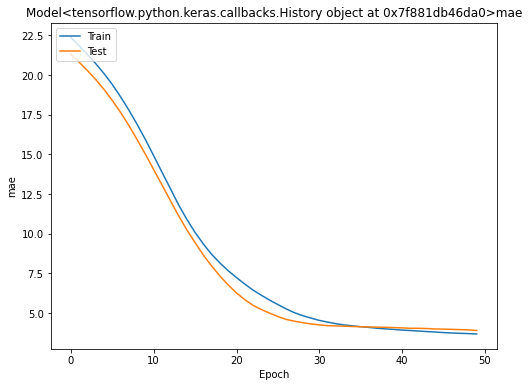

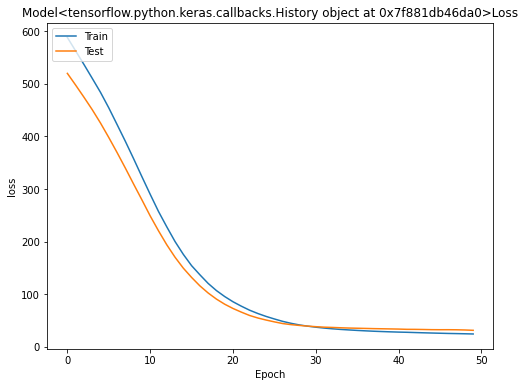

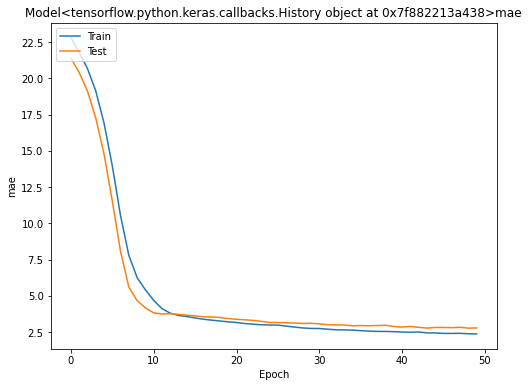

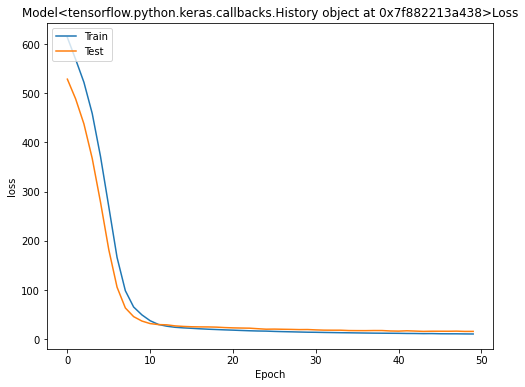

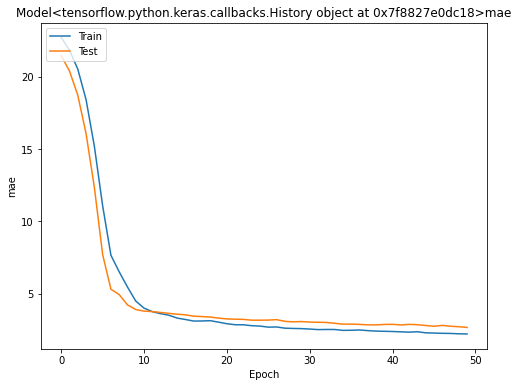

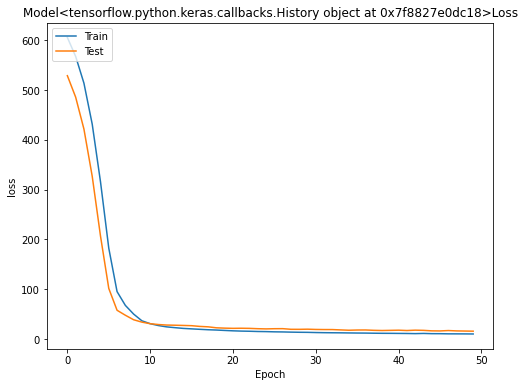

No handles with labels found to put in legend.


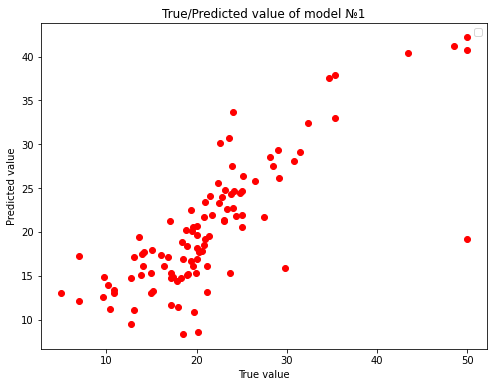

No handles with labels found to put in legend.


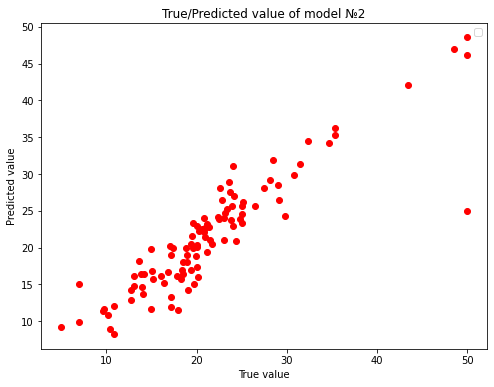

No handles with labels found to put in legend.


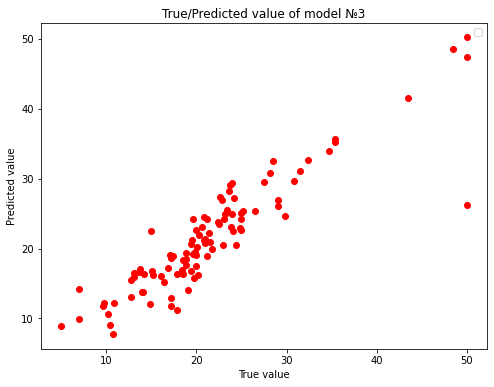

In [ ]:
# 50 эпох. На всех признаках данных + стандартизация внутри функции обучения
X_prepared = df.drop(columns=['MEDV']).values
y_prepared = y

result = pd.DataFrame()
result = pd.concat([result, train_model(X_prepared, y_prepared, callbacks_list, validation_split=0.2)])

In [ ]:
# Результаты
result

,dense_cnt,mae_train,mae_test
0,1,3.715959,3.523162
1,2,2.457590,2.302263
2,3,2.310997,2.322186


Вывод:
Результаты, полученные с помощью нейросетей, лучше, чем у Линейной. Однако, на данных, отобранных по корреляции, нейронная сеть показывает точность хуже, чем на полных данных

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 8.9MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456468 sha256=a19bd6db7e4ae37a820af08cae490d48c9fd3741f831b7231af3c631e849e114
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
import shap

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

lgbm = LGBMRegressor(random_state=17)
lgbm.fit(X_train, y_train)

(404, 13)
(404,)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
shap.initjs()
explainer = shap.DeepExplainer(lgbm, X_train[:10])
shap_values = explainer.shap_values(X_test[:10])
shap.summary_plot(shap_values, X_test, plot_type='bar')

AssertionError: ignored

In [ ]:
# с 1 сеткой для экспериментов
def train_experimental_model(X, y, callbacks_list, num_epochs=50, validation_split=0.2): 
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_split, random_state=42)
  
  print(X_train.shape)
  print(y_train.shape)

  # Стандартизация 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  #### Сеть #### 
  

  # 3 слоя
  model3 = Sequential()
  model3.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
  model3.add(Dense(50, activation='relu'))
  model3.add(Dense(10, activation='relu'))
  model3.add(Dense(1, activation='linear')) 
  model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

  h3 = model3.fit(X_train, y_train, epochs=num_epochs,
                  verbose=0, validation_split=validation_split,
                  callbacks=callbacks_list)

  mse_train, mae_train = model3.evaluate(X_train, y_train, verbose=0)
  mse_test, mae_test = model3.evaluate(X_test, y_test, verbose=0)
  
  # Результат по моделям в виде датафрэйма
  result = pd.DataFrame({'dense_cnt': 3, 
                          'mae_train': mae_train, 'mae_test': mae_test
                          }, index=[0])

  # Графики работы моделей

  plt.subplots(figsize=(8, 6)) 
  # Mae values
  plt.plot(h3.history['mae'])
  plt.plot(h3.history['val_mae']) # для тренировочного 
  plt.title('Model'+str(h3)+'mae')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  plt.subplots(figsize=(8, 6)) 
  # Loss values
  plt.plot(h3.history['loss'])
  plt.plot(h3.history['val_loss']) # для тренировочного 
  plt.title('Model'+str(h3)+'Loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
    

  # Графики сравнения моделей
  _, ax = plt.subplots(figsize=(8, 6))

  y_pred = model3.predict(X_test)

  # ax.scatter(y=pd.DataFrame(y_test).index, x=y_test, c = 'blue', label = 'Actual', alpha = 0.4, marker = 'x')
  # ax.scatter(y=pd.DataFrame(y_test).index, x=y_pred, c = 'red', label = 'Predicted', alpha = 0.8, marker = '*')

  # plt.title('Actual and predicted values of model '+str(i[0]))
  # plt.ylabel('test №')
  # plt.xlabel('value')

  ax.scatter(y=y_pred, x=y_test, c = 'red')
  plt.title('True/Predicted value of model №3')
  plt.ylabel('Predicted value')
  plt.xlabel('True value')
  plt.legend()
  plt.show()

  # shap values 
  shap.initjs()
  explainer = shap.DeepExplainer(model3, X_train[:100])
  shap_values = explainer.shap_values(X_test[:100])
  shap.summary_plot(shap_values, X_test, plot_type='bar')

  result = result.reset_index(drop=True)
  return result
 

(404, 13)
(404,)


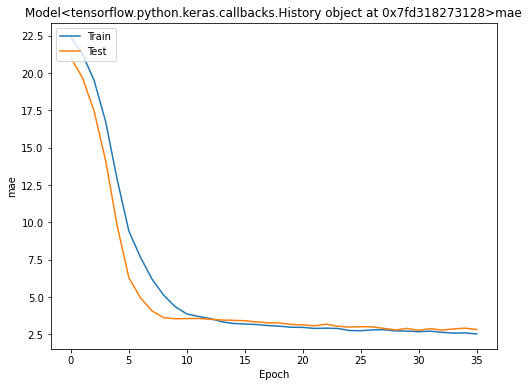

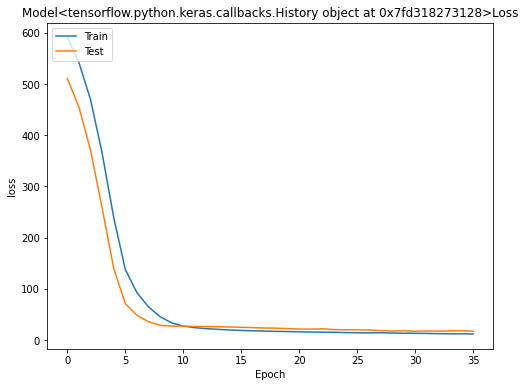

No handles with labels found to put in legend.


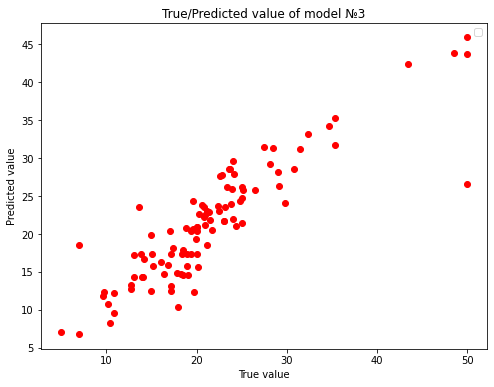

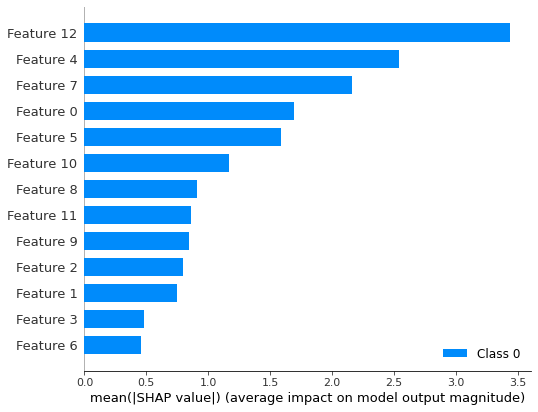

In [ ]:
# shap values
result = pd.DataFrame()
result = pd.concat([result, train_experimental_model(X, y, callbacks_list, validation_split=0.2)])

In [ ]:
X.head

(404, 8)
(404,)


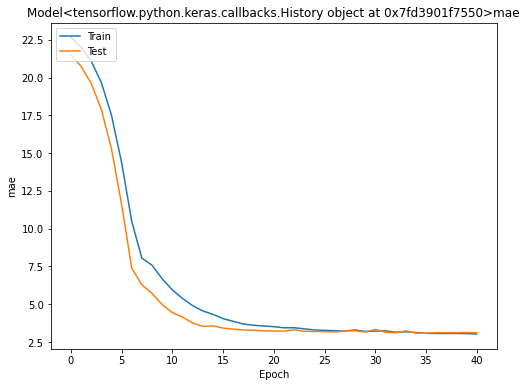

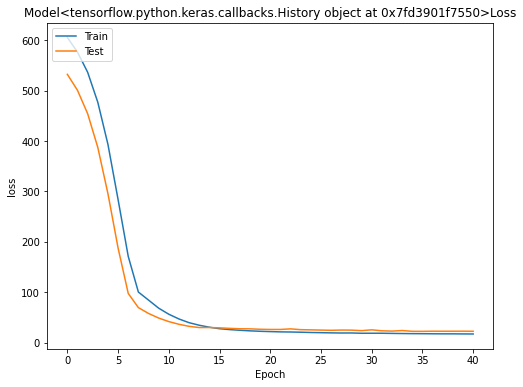

No handles with labels found to put in legend.


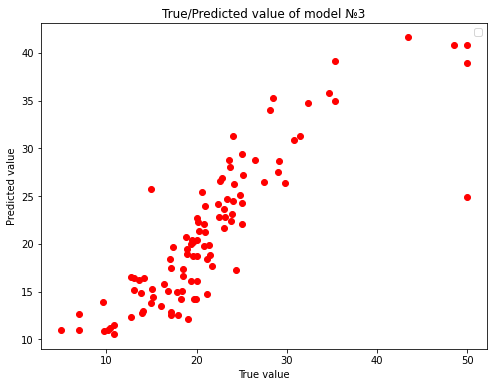

In [ ]:
# 50 эпох. На нормализованных данных
result = pd.DataFrame()
result = pd.concat([result, train_experimental_model(x, y, callbacks_list, validation_split=0.2)])

In [ ]:
result

,dense_cnt,mae_train,mae_test
0,3,3.038461,2.875716


(404, 13)
(404,)


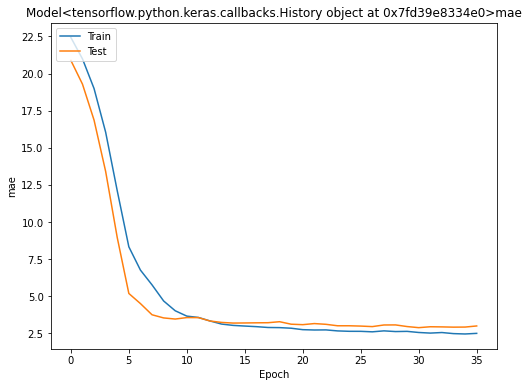

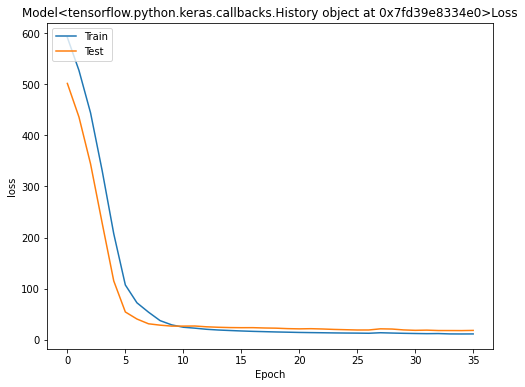

No handles with labels found to put in legend.


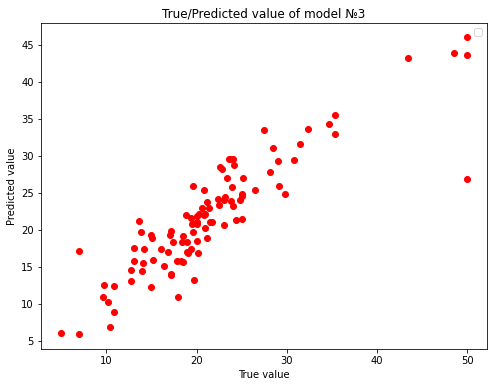

In [ ]:
# 50 эпох. На данных без обработки
result = pd.DataFrame()
result = pd.concat([result, train_experimental_model(X, y, callbacks_list, validation_split=0.2)])

In [ ]:
result

,dense_cnt,mae_train,mae_test
0,3,2.573332,2.613919


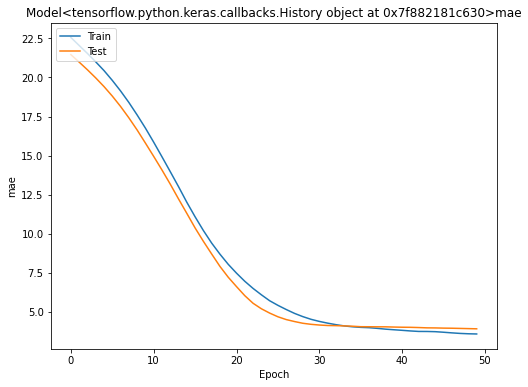

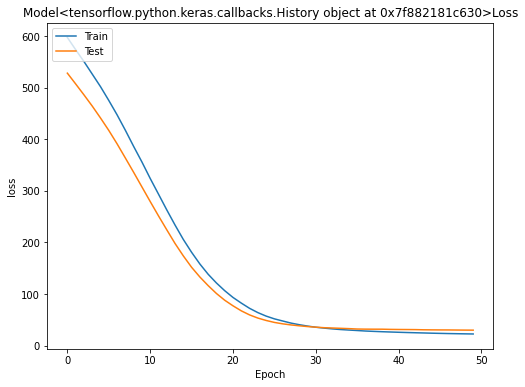

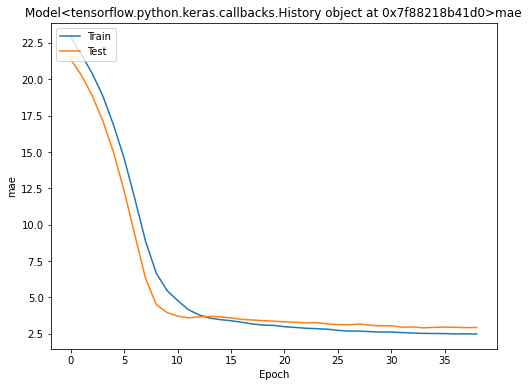

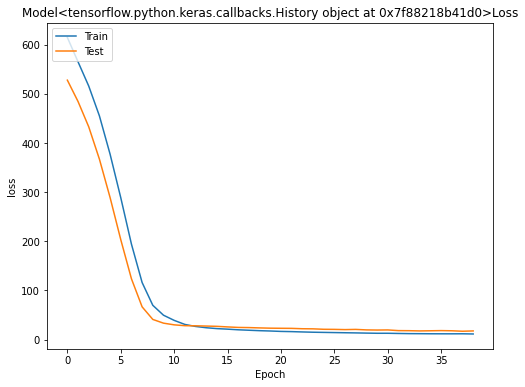

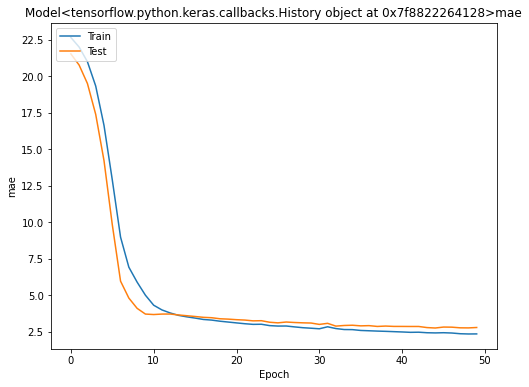

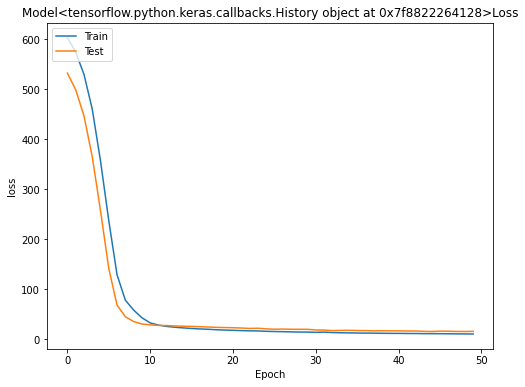

No handles with labels found to put in legend.


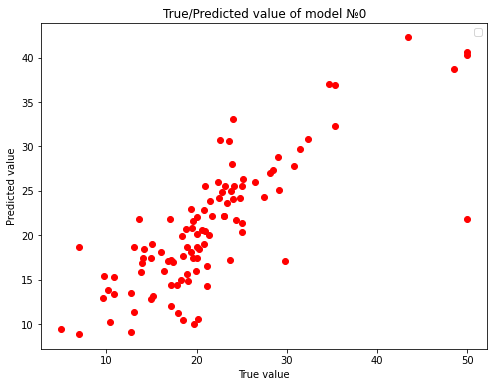

No handles with labels found to put in legend.


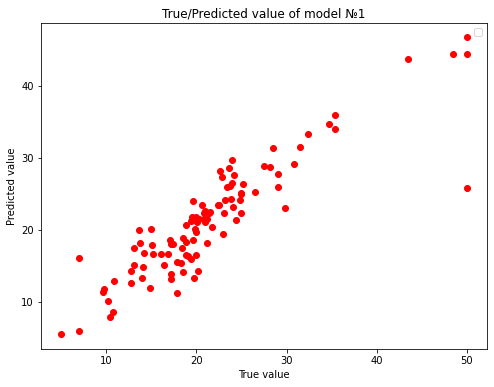

No handles with labels found to put in legend.


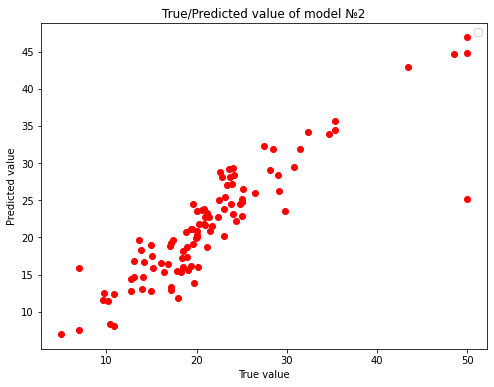

In [ ]:
# 50 эпох. На данных без обработки
result = pd.DataFrame()
result = pd.concat([result, train_model(X, y, callbacks_list, validation_split=0.2)])

In [ ]:
result

,dense_cnt,mae_train,mae_test
0,1,3.640959,3.459061
1,2,2.528418,2.422717
2,3,2.432099,2.493156


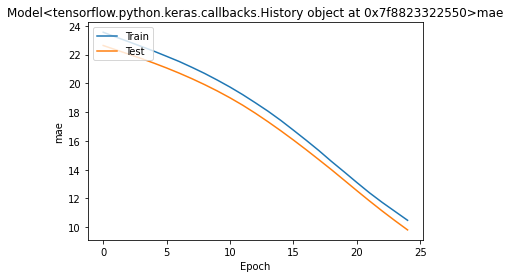

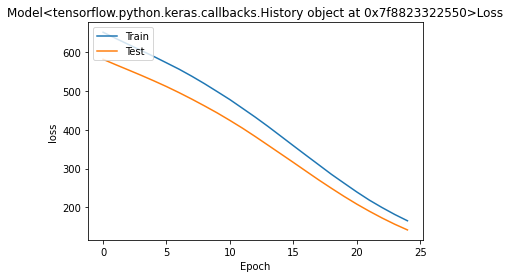

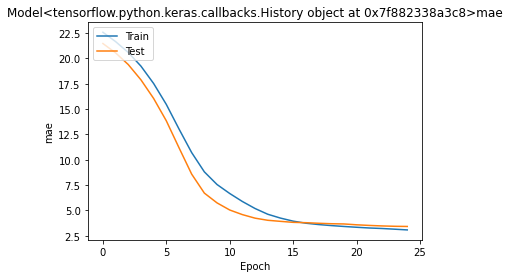

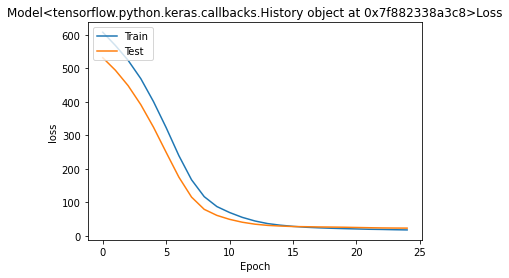

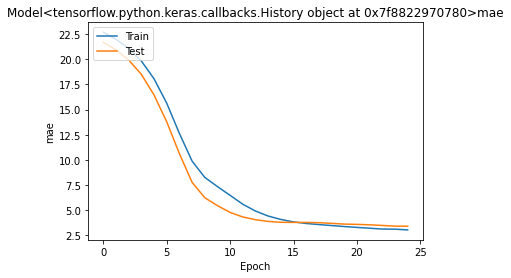

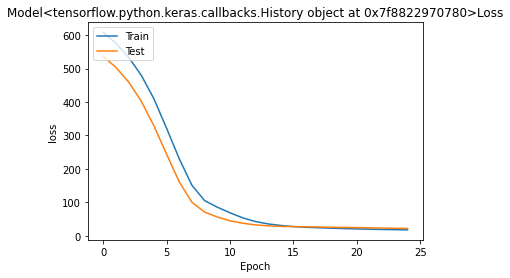

No handles with labels found to put in legend.


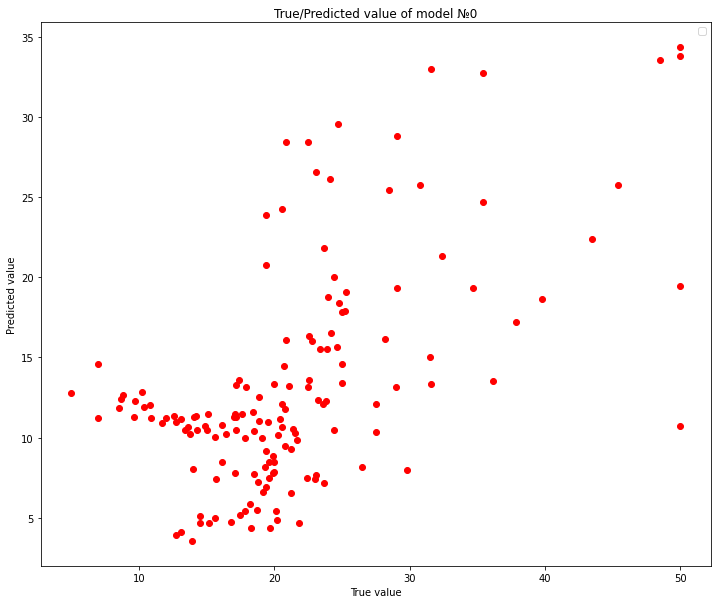

No handles with labels found to put in legend.


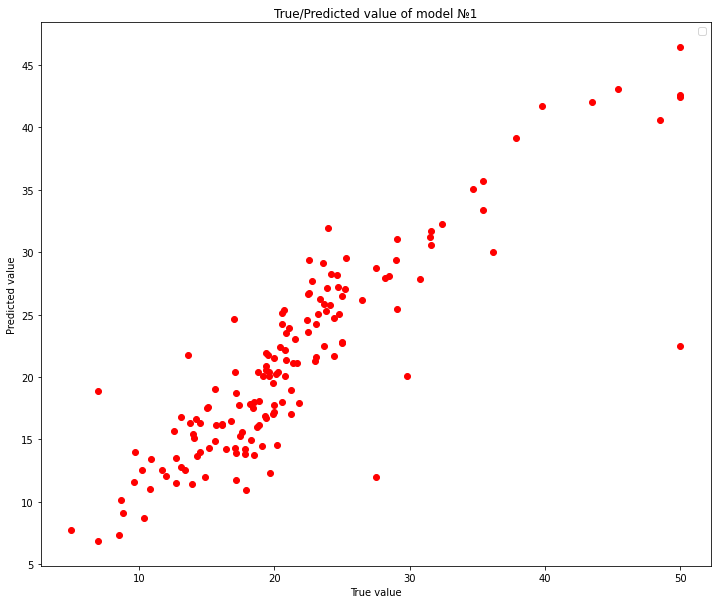

No handles with labels found to put in legend.


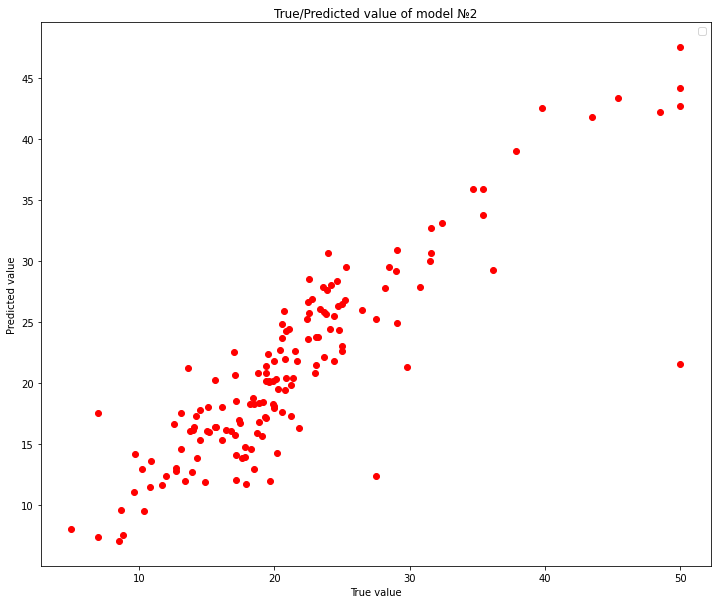

In [ ]:
# 25 эпох
result = pd.DataFrame()
result = pd.concat([result, train_model(X, y, callbacks_list, 25)])

In [ ]:
result

,dense_cnt,mae_train,mae_test
0,1,10.058491,9.206917
1,2,3.149408,2.688412
2,3,3.110731,2.648128


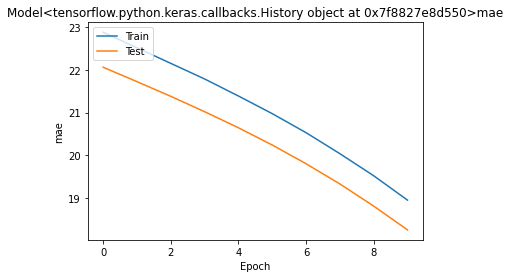

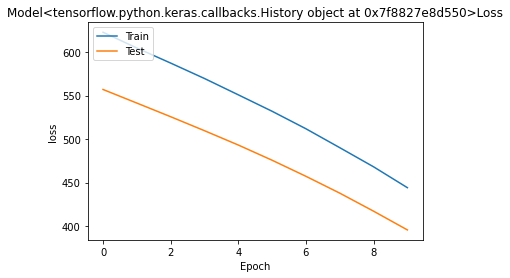

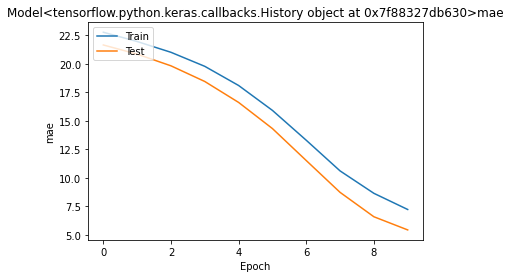

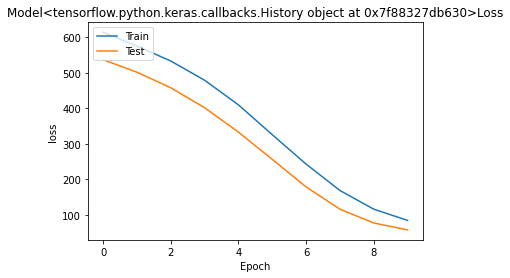

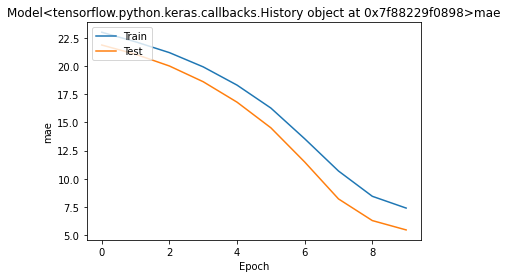

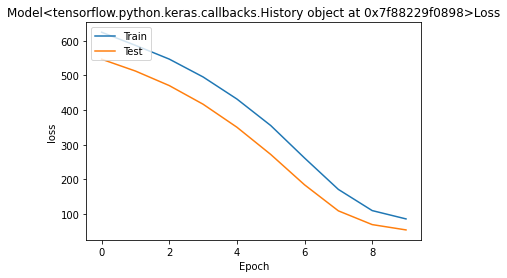

No handles with labels found to put in legend.


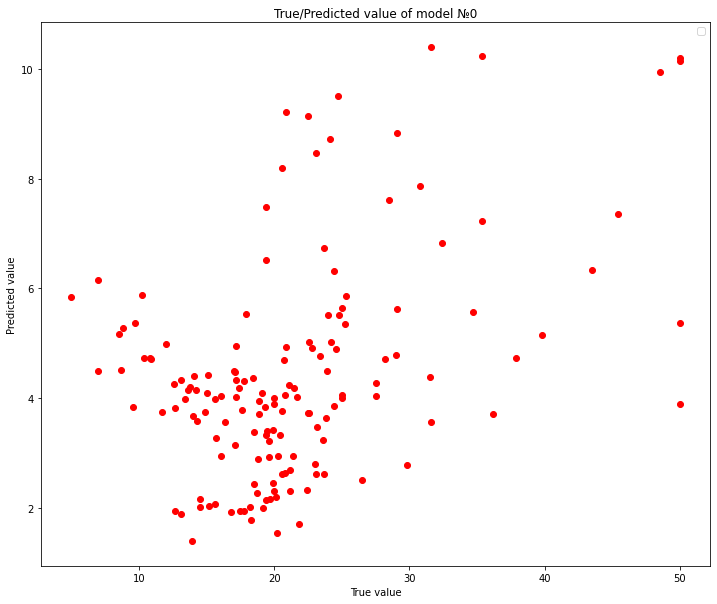

No handles with labels found to put in legend.


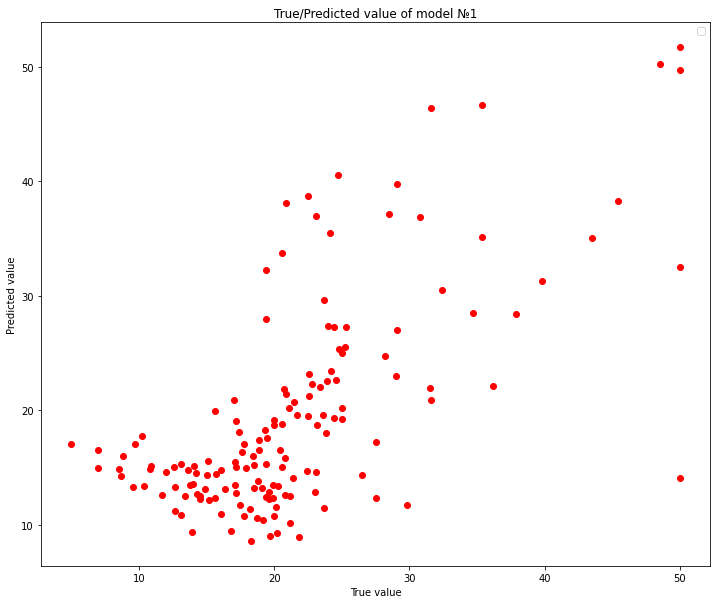

No handles with labels found to put in legend.


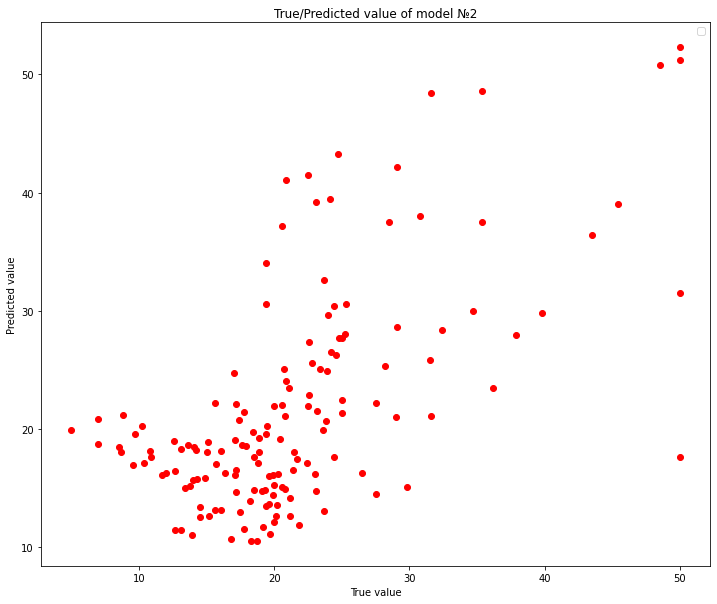

In [ ]:
# 10 эпох
result = pd.DataFrame()
result = pd.concat([result, train_model(X, y, callbacks_list, 10)])